## SCS_3251_003: Statistics for Data Science
#### <font color ='blue'>Assignment 1 - Beer Consumption & Attractiveness to Mosquitoes</font>

###### Step 1: Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import random as rndm
import numpy as np
import scipy.stats as st
%matplotlib inline

###### Step 2: Read in the data and split beer and water treatment observations into separate datasets

In [2]:
allObservations = pd.read_csv("C:/Users/clockwork/Downloads/mosquitos_data.csv", sep=',',)
beerTrtmtObservations = allObservations[allObservations.Treatment == "Beer"]
waterTrtmtObservations = allObservations[allObservations.Treatment == "Water"]

###### Step 3: Investigate relationship between beer consumption and attractiveness to mosquitoes

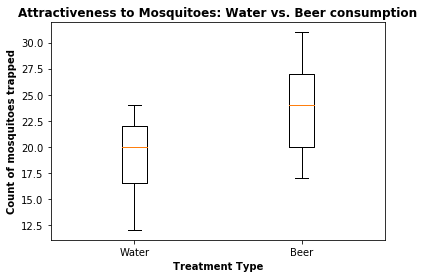

**Mosquitoes trapped under Water Treatment:**

          count       mean      std   min   25%   50%   75%   max
Response   18.0  19.222222  3.67112  12.0  16.5  20.0  22.0  24.0


**Mosquitoes trapped under Beer Treatment:**

          count  mean       std   min   25%   50%   75%   max
Response   25.0  23.6  4.133199  17.0  20.0  24.0  27.0  31.0


In [3]:
## Step 3A: Make boxplots for the data
plt.boxplot([waterTrtmtObservations.Response, beerTrtmtObservations.Response])
plt.title("Attractiveness to Mosquitoes: Water vs. Beer consumption", fontdict=dict(weight='bold'))
plt.xlabel("Treatment Type", fontdict=dict(weight='bold'))
plt.ylabel("Count of mosquitoes trapped", fontdict=dict(weight='bold'))
plt.xticks([1, 2], ['Water', 'Beer'])
plt.show()

## Step 3B: describe the data
display(Markdown("**Mosquitoes trapped under Water Treatment:**"))
print(waterTrtmtObservations.describe().transpose())
display(Markdown("**Mosquitoes trapped under Beer Treatment:**"))
print(beerTrtmtObservations.describe().transpose())

###### Interpretation of data:
From the box-plot and summary statistics above, it seems apparent that mosquitoes have a somewhat greater affinity for people who have consumed beer as compared to people who have consumed water.

__Means & Medians__:
On average, __4.4__ additional mosquitoes were found in the trap when partipants had consumed beer as compared to when participants had consumed water, representing an increase of about __23%__.

The difference in __median__ values (represented by the _second quartile_ values for each case: __24__ and __20__) also show a similiar level of difference: __4__ more mosquitoes under the beer treatment compared to water representing a __20%__ increase.

The 1st and 3rd quartlie values (20 and 27 respectively) under beer treatment are also greater respectively than those under water treatment (16.5 and 22).

__Inference:__

Given that the number of mosquitoes trapped is consistently higher in the case of participants that consumed beer as compared to participants who consumed water, it seems likely that there is some sort of correlation between beer consumption and attractiveness to mosquitoes.

##### Step 4: Simulate 'randomly' generated groups of data to test relationship between beer consumption and attractiveness to mosquitoes

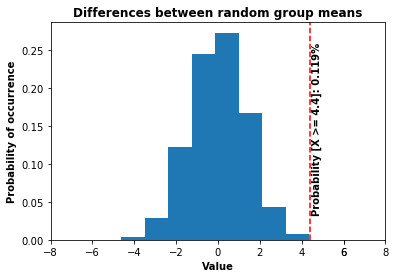

**Probability that the difference between group means is >= 4.4: 0.119%**

In [5]:
# 4A: make a copy of the full list of observations so we don't alter the original data frame
responseList = pd.Series.copy(allObservations.loc[:, 'Response'], deep=True)

listOfDiffs = pd.Series([])
rndm.seed(12345)
for simCounter in range(0, 50000):
    #Shuffle the list
    rndm.shuffle(responseList)
    #Set the first 20 elements as Group 1 and the remaining as Group 2
    listOfDiffs.set_value(simCounter, (np.mean(responseList[0:20])- np.mean(responseList[20:43])))
    
# 4B: plot a histogram with the differences in means of both groups on the x axis and the probability of occurence
# on the y-axis.
plt.hist(listOfDiffs, normed=1)
plt.axvline(x = 4.4, color = 'r', linestyle='dashed')
plt.title("Differences between random group means", fontdict=dict(weight='bold'))
plt.xlabel("Value", fontdict=dict(weight='bold'))
plt.ylabel("Probability of occurrence", fontdict=dict(weight='bold'))

# 4C: the data appears to be randomly distributed - calculate the probability that the difference between randomly
# generated group means is >= 4.4
probability = round(st.norm.sf((4.4 - np.mean(listOfDiffs))/np.std(listOfDiffs))*2*100, 4)
plt.text(4.5,0.25,'Probability [X >= 4.4]: ' + str(probability) +'%',rotation=90, fontdict=dict(weight='bold'))
plt.xticks(list(plt.xticks()[0]) + [6] )
plt.show()    

display(Markdown("**Probability that the difference between group means is >= 4.4: "+ str(probability) +"%**"))

###### Interpretation of histogram:
It is apparent from the plot above that the probability that the differences between the means of the two groups is greater than or equal to the observed value of __4.4__ could have occured __purely by chance__ is extremely low.

Thus, we conclude that there is a very strong possibility that beer consumption makes humans more attractive to mosquitoes.